# **다섯째마당. 데이터 과학의 세계**
---
---

# 14 통계 분석 기법을 이용한 가설 검정

## 14-1 가설 검정이란?

## 14-2 t 검정 - 두 집단의 평균 비교하기

### compact 자동차와 suv 자동차의 도시 연비 t 검정

In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [2]:
## 기술 통계 분석

# compact, suv 추출하기
# category별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('category in ["compact", "suv"]') \
   .groupby('category', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [3]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [4]:
# t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

### 일반 휘발유와 고급 휘발유의 도시 연비 t 검정

In [5]:
## 기술 통계 분석

# r, p 추출하기
# fl별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [6]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

In [7]:
# t-test
stats.ttest_ind(regular, premium, equal_var = True)

Ttest_indResult(statistic=-1.066182514588919, pvalue=0.28752051088667036)

## 14-3 상관분석 - 두 변수의 관계 분석하기

### 실업자 수와 개인 소비 지출의 상관관계

#### 1. 상관계수 구하기

In [8]:
# economics 데이터 불러오기
economics = pd.read_csv('economics.csv')

# 상관행렬 만들기
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


#### 2. 유의확률 구하기

In [9]:
# 상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

(0.6145176141932079, 6.773527303292085e-61)

### 상관행렬 히트맵 만들기

#### 1. 상관행렬 만들기

In [10]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
car_cor = mtcars.corr()      # 상관행렬 만들기
car_cor = round(car_cor, 2)  # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


#### 2. 히트맵 만들기

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',           # 해상도 설정
                     'figure.figsize': [7.5, 5.5]})  # 가로 세로 크기 설정

<AxesSubplot:>

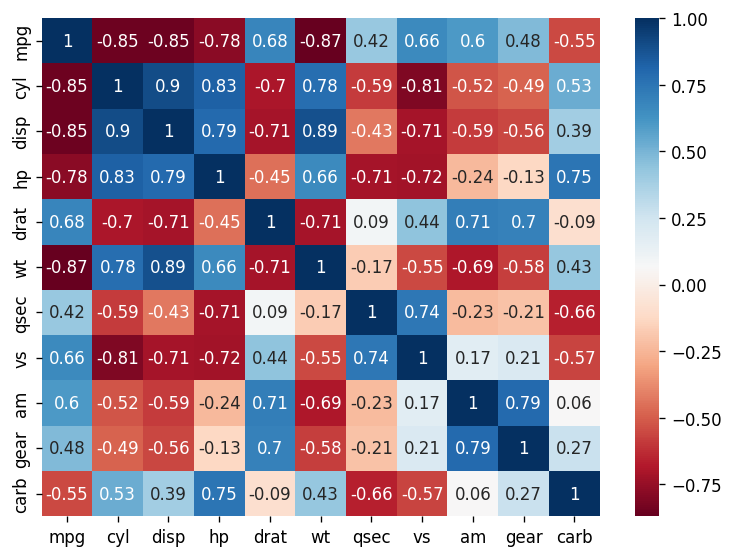

In [13]:
# 히트맵 만들기
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu')  # 컬러맵

#### 3. 대각 행렬 제거하기

**(1) mask 만들기**

In [14]:
# mask 만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**(2) 히트맵에 mask 적용하기**

<AxesSubplot:>

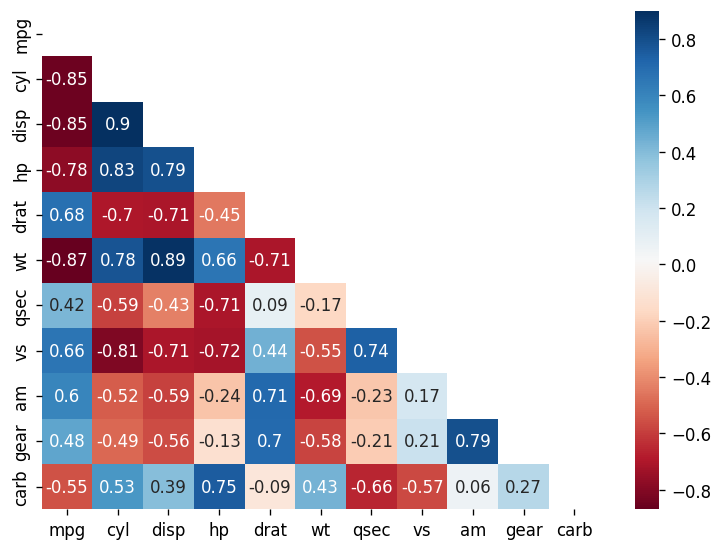

In [16]:
# 히트맵 만들기
sns.heatmap(data = car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu',  # 컬러맵
            mask = mask)    # mask 적용


**(3) 빈 행과 열 제거하기**

<AxesSubplot:>

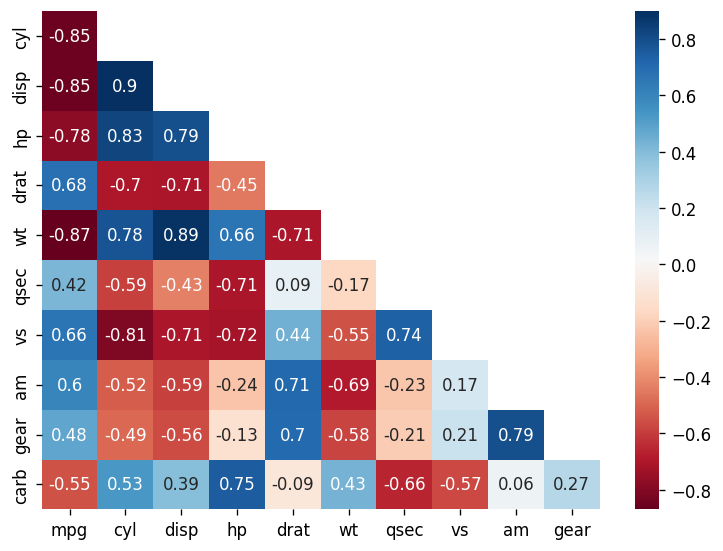

In [17]:
mask_new = mask[1:, :-1]         # mask 첫 번째 행, 마지막 열 제거
cor_new = car_cor.iloc[1:, :-1]  # 상관행렬 첫 번째 행, 마지막 열 제거

# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,       # 상관계수 표시
            cmap = 'RdBu',      # 컬러맵
            mask = mask_new)    # mask 적용

<AxesSubplot:>

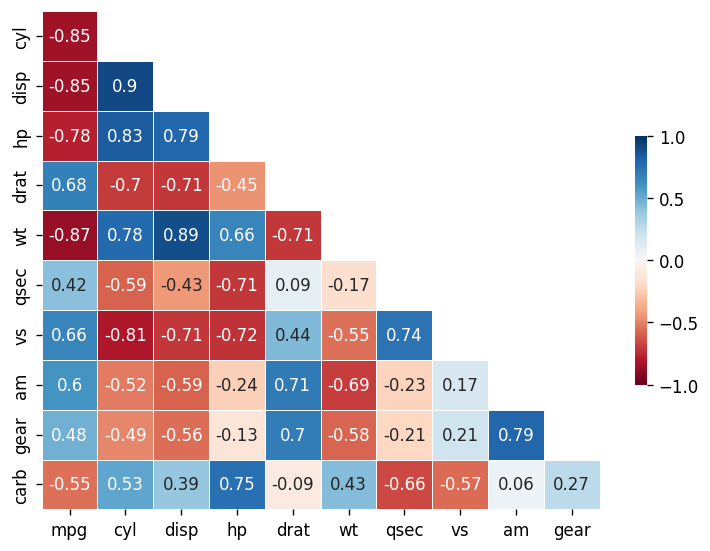

In [18]:
# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,               # 상관계수 표시
            cmap = 'RdBu',              # 컬러맵
            mask = mask_new,            # mask 적용
            linewidths = .5,            # 경계 구분선 추가
            vmax = 1,                   # 가장 진한 파란색으로 표현할 최대값
            vmin = -1,                  # 가장 진한 빨간색으로 표현할 최소값
            cbar_kws = {'shrink': .5})  # 범례 크기 줄이기